# Importing necessary libraries


In [63]:
import numpy as np
import pandas as pd

# metrics and score
from sklearn.metrics import accuracy_score
from sklearn import tree, metrics

# learning algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier

# spliting and evaluation methods
from sklearn.model_selection import train_test_split, cross_val_score,
GridSearchCV, RandomizedSearchCV, cross_val_predict

# Dimensionality Reduction
from sklearn.decomposition import PCA

# plotting
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
from termcolor import colored
import seaborn as sns

# Image proccessing libraries
import os
from skimage import color
import cv2
from PIL import Image, ImageOps
import random

# warning alerts ignoring
import warnings
warnings.filterwarnings('ignore')

# Visualization of the data

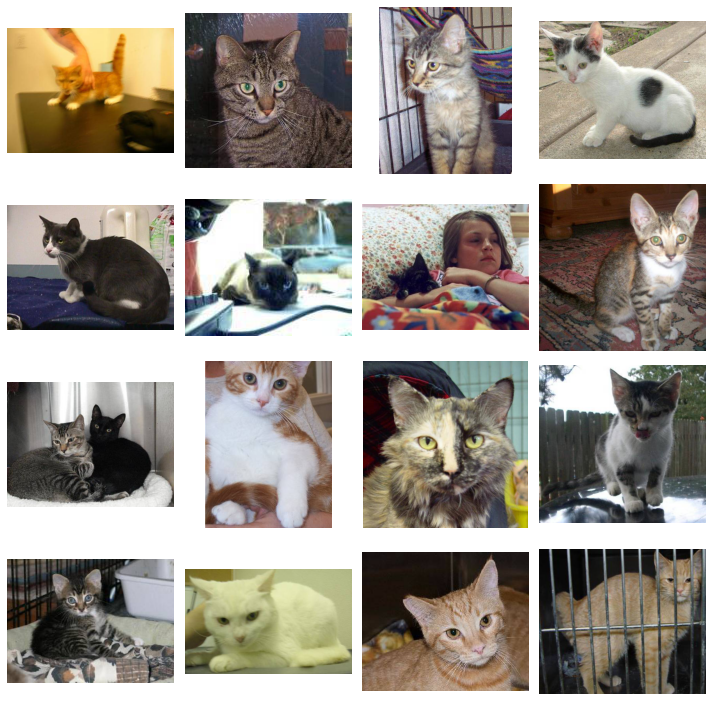

In [2]:
rows = 4
cols = 4
axes = []
fig=plt.figure(figsize=(10,10))
i = 0

for a in range(rows*cols):
    im = Image.open(fr"C:\Users\avi\Downloads\train\train\cat.{i}.jpg")
    sp = fig.add_subplot(rows,cols,a+1);
    axes.append(sp);
    sp.axis('off');
    plt.imshow(im)
    i+=1
fig.tight_layout()
plt.show()

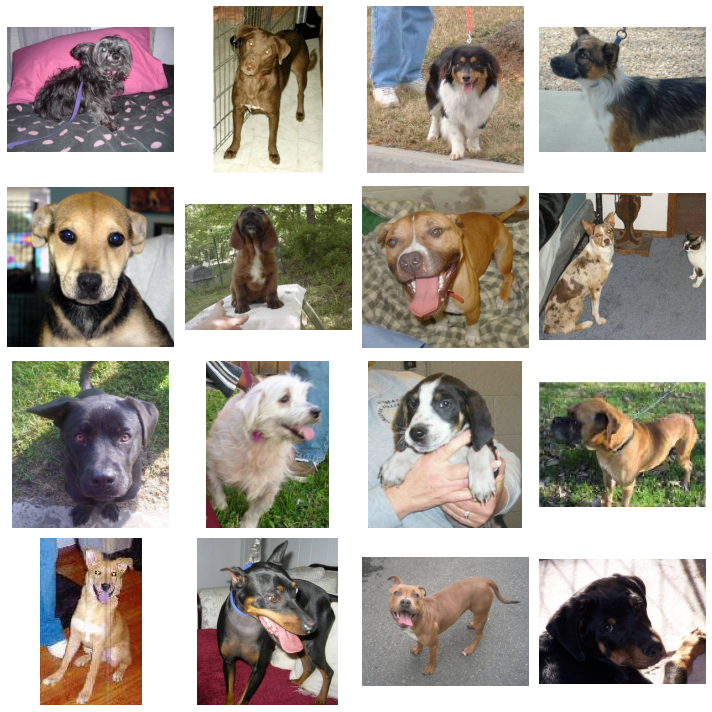

In [3]:
rows = 4
cols = 4
axes = []
fig=plt.figure(figsize=(10,10))
i = 0

for a in range(rows*cols):
    im = Image.open(fr"C:\Users\avi\Downloads\train\train\dog.{i}.jpg")
    sp = fig.add_subplot(rows,cols,a+1);
    axes.append(sp);
    sp.axis('off');
    plt.imshow(im)
    i+=1
fig.tight_layout()
plt.show()

We can see that our data is colored and not in certain size for all images so I am going to resize all the images to equal size and to recolor the data to gray instead of RGB color data.

In [4]:
DIRECTORY = r'C:\Users\avi\Downloads\train\train'
IMG_SIZE = 40
data = []

for img_name in os.listdir(DIRECTORY):
    img_path = os.path.join(DIRECTORY, img_name)
    gray_img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2GRAY)
    img_arr = cv2.resize(gray_img, (IMG_SIZE, IMG_SIZE))
    data.append([img_arr, (img_name.split('.')[0])])

random.seed(10)
random.shuffle(data)
x = []
y = []

for features, labels in data:
    x.append(features)
    y.append(labels)
    
x = np.array(x)
y = np.array(y)

x is the set of features and y is the set of labels.

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

To work with the data and to apply models I need to convert the data to dataframe, but first i need to reshape the data so i can apply the dataframe.

In [6]:
feature_test = X_test.reshape(5000, 1600)
df_test = pd.DataFrame(feature_test)
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,1590,1591,1592,1593,1594,1595,1596,1597,1598,1599
0,10,3,7,11,42,63,62,61,60,30,...,198,8,22,78,78,80,64,69,63,56
1,190,186,104,39,6,6,6,5,6,8,...,91,107,115,119,118,115,116,115,114,105
2,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
3,127,127,125,119,134,127,127,132,127,126,...,193,201,198,195,200,192,198,203,197,187
4,199,173,187,170,161,124,161,238,153,215,...,113,118,74,159,158,116,144,182,189,159


In [7]:
feature_train = X_train.reshape(20000, 1600)
df_train = pd.DataFrame(feature_train)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,1590,1591,1592,1593,1594,1595,1596,1597,1598,1599
0,127,127,158,157,177,180,194,192,231,206,...,167,135,167,119,136,196,137,103,182,106
1,31,34,1,1,1,1,1,7,36,54,...,91,20,35,38,38,38,50,51,62,51
2,138,137,134,137,132,131,128,145,127,122,...,222,208,208,214,225,206,199,211,228,228
3,27,27,32,31,12,7,9,8,9,12,...,132,171,112,125,69,109,82,86,35,43
4,22,26,25,27,46,36,29,26,28,33,...,249,234,206,185,58,54,40,84,32,44


In [ ]:
ax = sns.countplot(Y_train, palette=['#a6cee3',"#b2df8a"])
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=15)

We can see that the data is quite balanced except for a small number of data but, it doesn't require to use SMOTE  class to balance the data.

In [9]:
X_train.shape

(20000, 40, 40)

In [ ]:
plt.imshow(X_train[0], cmap = plt.cm.binary)

# Creating simple models

In [11]:
naive_model = GaussianNB()
rf_model = RandomForestClassifier(n_estimators = 250)
dt_model = tree.DecisionTreeClassifier(max_depth = 10)
knn_model = KNeighborsClassifier(n_neighbors = 37)

In [12]:
naive_model.fit(df_train, Y_train)

GaussianNB()

In [13]:
rf_model.fit(df_train, Y_train)

RandomForestClassifier(n_estimators=250)

In [14]:
dt_model.fit(df_train, Y_train)

DecisionTreeClassifier(max_depth=10)

In [15]:
knn_model.fit(df_train, Y_train)

KNeighborsClassifier(n_neighbors=37)

In [16]:
classifiers = {"knn": knn_model,
               "decisionTree": dt_model,
               "randomForest": rf_model,
               "naiveBayes": naive_model}

KeyboardInterrupt: 

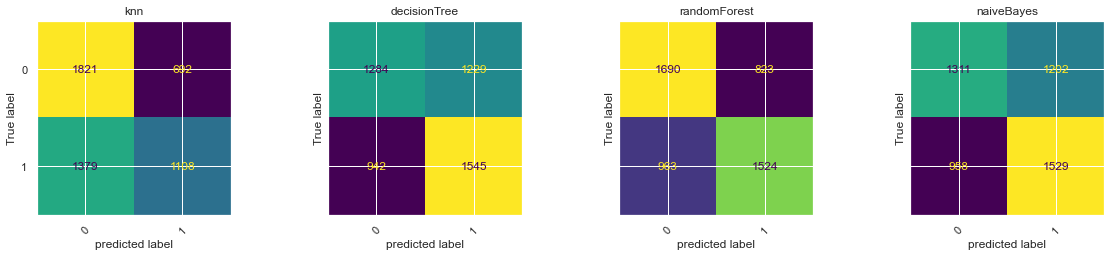

In [62]:
f, axes = plt.subplots(1, 4, figsize=(20, 5), sharey='row')
for i, (key, classifier) in enumerate(classifiers.items()):
    y_pred = classifier.fit(df_train, Y_train).predict(df_test)
    cf_matrix = metrics.confusion_matrix(Y_test, y_pred)
    disp = metrics.ConfusionMatrixDisplay(cf_matrix)
    disp.plot(ax=axes[i], xticks_rotation=45)
    disp.ax_.set_title(key)
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('predicted label')
    disp.ax_.set_ylabel('True label')

f.colorbar(disp.im_, ax=axes)
plt.show()

# need to fill again

The confusion matrix can give us a little bit information for the models. We can infer from the plot that

In [18]:
models = ['knn','decisionTree', 'randomForest', 'naiveBayes']

In [19]:
count = 0
for i in [knn_model, dt_model, rf_model, naive_model]:
    y_pred_train = i.predict(df_train)
    y_pred_test = i.predict(df_test)
    print(f"The train Accuracy for {models[count]} model is:", accuracy_score(y_true = Y_train, y_pred = y_pred_train))
    print(f"The test Accuracy for {models[count]} model is:", accuracy_score(y_true = Y_test, y_pred = y_pred_test))
    print()
    count = count+1

The train Accuracy for knn model is: 0.62865
The test Accuracy for knn model is: 0.5858

The train Accuracy for decisionTree model is: 0.7103
The test Accuracy for decisionTree model is: 0.5672

The train Accuracy for randomForest model is: 1.0
The test Accuracy for randomForest model is: 0.6478

The train Accuracy for naiveBayes model is: 0.5787
The test Accuracy for naiveBayes model is: 0.568



To check the importance of the features for "RandomForest" and "DecisionTree" models I'm going to use the 'feature_importances_' function and plot the results.

In [ ]:
sort = rf_model.feature_importances_.argsort()
plt.bar(df_train.columns[sort], rf_model.feature_importances_[sort])
plt.xlabel("Feature Importance")

In [ ]:
sort = dt_model.feature_importances_.argsort()
plt.bar(df_train.columns[sort], dt_model.feature_importances_[sort])
plt.xlabel("Feature Importance")

In [ ]:
img_shape = df_train.loc[0].values.reshape(40, 40).shape
importances = rf_model.feature_importances_
imp_reshaped = importances.reshape(img_shape)
plt.matshow(imp_reshaped, cmap=plt.cm.hot)
plt.title("Pixel importances using impurity values")
plt.colorbar()
plt.show()

In [ ]:
img_shape = df_train.loc[0].values.reshape(40, 40).shape
importances = dt_model.feature_importances_
imp_reshaped = importances.reshape(img_shape)
plt.matshow(imp_reshaped, cmap=plt.cm.hot)
plt.title("Pixel importances using impurity values")
plt.colorbar()
plt.show()

As we can see we don't have much attention to specific features, it means that all pixels are important and we can't ignore from some of them but, there are few pixels that more significant then others for example: the RandomForest model give more importance to the pixels 800-1000.

# Dimensionality Reduction - PCA

In [24]:
pca = PCA(n_components = 450)
x2d = pca.fit_transform(df_train)

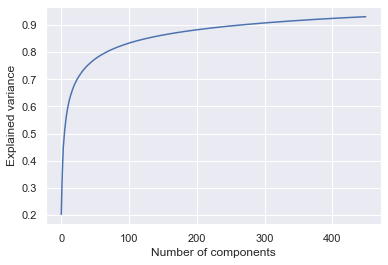

In [25]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of components")
plt.ylabel("Explained variance")
plt.savefig('elbow_plot.png', dpi = 100)

In [26]:
for i in range(10, 450, 50):
    print(f'Variance explained by {i} components is:', np.cumsum(pca.explained_variance_ratio_ * 100)[i])

Variance explained by 10 components is: 60.188604793894385
Variance explained by 60 components is: 79.09531219344748
Variance explained by 110 components is: 84.02867267196268
Variance explained by 160 components is: 86.71228197908489
Variance explained by 210 components is: 88.51338834480312
Variance explained by 260 components is: 89.85296091880906
Variance explained by 310 components is: 90.91539149759318
Variance explained by 360 components is: 91.79020912406912
Variance explained by 410 components is: 92.52503843369324


In the code above I checked how much percentage of the variance in the data the PCA save, and I came to conclusion that 450 components for the pca is good enough because of 2 aspects:
1) It's almost a quarter of the data but still keep a good varience.

2) It's keep 93% of the varience.

In [27]:
columns = []
for i in range(450):
    columns.append(f'PcaPixel{i+1}')

In [28]:
df_pca = pd.DataFrame(x2d, columns = columns)
df_pca.head()

,PcaPixel1,PcaPixel2,PcaPixel3,PcaPixel4,PcaPixel5,PcaPixel6,PcaPixel7,PcaPixel8,PcaPixel9,PcaPixel10,...,PcaPixel441,PcaPixel442,PcaPixel443,PcaPixel444,PcaPixel445,PcaPixel446,PcaPixel447,PcaPixel448,PcaPixel449,PcaPixel450
0,1465.100790,14.145682,-93.137585,-56.187407,444.095676,-221.908559,151.365686,4.129754,-360.513561,91.528753,...,-24.830118,-95.249789,-19.206972,7.593907,-21.867620,29.667650,-10.258911,-61.895783,5.757891,-61.882365
1,21.850593,-1823.234581,-1386.867763,809.948114,26.016361,879.964041,32.796480,-935.357794,-660.415677,-147.557254,...,15.192870,21.388673,26.463702,41.961740,17.153011,5.875295,2.164789,41.015462,0.536411,-57.111880
2,684.124725,-593.178297,1629.161877,-322.420565,288.249055,-669.487428,-65.936767,103.324394,330.388736,346.682614,...,-6.168110,-31.161558,18.216381,-37.298211,-37.498369,18.910752,-17.408985,-21.958066,18.575807,-36.744501
3,-1401.163278,-2046.415927,-134.408652,306.983129,-1287.824942,-364.960945,469.726095,-37.007242,-566.056291,-4.184869,...,7.638284,2.734190,-44.184043,-9.613428,-34.384324,-28.157260,16.153348,-46.838662,-4.933856,-14.797593
4,-815.607812,-1488.061298,1212.112343,-455.321734,-680.390422,522.465513,-137.910966,311.327550,-447.151989,699.780423,...,-34.919520,59.451092,-43.938162,-26.269148,-27.721209,18.228160,22.938551,40.756550,37.224948,22.116987


# Creating Ensemble Models

Explanation for each model:
1) AdaBoost - The name 'Ada' come from Adaptive because this model can adapt himself...

2) GradientBoosting - We will see that This is the best model for our data, this model learn the data and transfer the errors to the next learner and did this again and again until it reach the maximum number of estimators(learners).

3) Bagging - 

In [29]:
adaBoost_model = AdaBoostClassifier(rf_model, n_estimators = 250, algorithm="SAMME.R", learning_rate=0.021)
grBoost_model = GradientBoostingClassifier(n_estimators = 140, learning_rate = 0.2, warm_start = True)
bagging_model = BaggingClassifier(dt_model, n_estimators = 200, max_samples=100, random_state=42,bootstrap=True, n_jobs=-1)

In [30]:
for k in range(1,50,2):
    knn = KNeighborsClassifier(n_neighbors = k)
    ValScore = cross_val_score(knn, df_pca, Y_train, cv = 10).mean()
    print(f"Cross-validation score for k = {k} is:", ValScore)

Cross-validation score for k = 1 is: 0.557
Cross-validation score for k = 3 is: 0.5688
Cross-validation score for k = 5 is: 0.5809499999999999
Cross-validation score for k = 7 is: 0.5814999999999999
Cross-validation score for k = 9 is: 0.58775
Cross-validation score for k = 11 is: 0.5921000000000001
Cross-validation score for k = 13 is: 0.5959
Cross-validation score for k = 15 is: 0.5962999999999999
Cross-validation score for k = 17 is: 0.5985000000000001
Cross-validation score for k = 19 is: 0.5997
Cross-validation score for k = 21 is: 0.6012500000000001
Cross-validation score for k = 23 is: 0.6017499999999999
Cross-validation score for k = 25 is: 0.6019500000000001
Cross-validation score for k = 27 is: 0.6009000000000001
Cross-validation score for k = 29 is: 0.6016999999999999
Cross-validation score for k = 31 is: 0.6032000000000001
Cross-validation score for k = 33 is: 0.6031000000000001
Cross-validation score for k = 35 is: 0.6027
Cross-validation score for k = 37 is: 0.60420000000

In [31]:
knn_model_pca = KNeighborsClassifier(n_neighbors = 49)

In [32]:
knn_model_pca.fit(df_pca, Y_train)

KNeighborsClassifier(n_neighbors=49)

In [33]:
naive_model.fit(df_pca, Y_train)

GaussianNB()

In [34]:
rf_model.fit(df_pca, Y_train)

RandomForestClassifier(n_estimators=250)

In [35]:
dt_model.fit(df_pca, Y_train)

DecisionTreeClassifier(max_depth=10)

In [36]:
adaBoost_model.fit(df_pca, Y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=250),
                   learning_rate=0.021, n_estimators=250)

In [ ]:
for i in  range(100, 300, 10):
    gr2.n_estimators = i
    gr2.fit(df_pca, Y_train)
    print(f' for n_estimators = {i} the accuracy is:{accuracy_score(Y_train, gr2.predict(df_pca))}')

In [76]:
# for i in  range(100, 300, 10):
#     gr2.n_estimators = i
#     predicted = cross_val_predict(gr2, df_test_pca, Y_test, n_jobs = -1)
#     print(f' for n_estimators = {i} the cross val predict accuracy is:{accuracy_score(Y_test, predicted)}')

We can see that the best parameters for the gradient boosting model is: "learning rate = 0.2 and n_estimators = 280" with 0.8.. accuracy in the train set that is pretty good, i chose this n_estimators number because in the cross_val_predict function the accuracy started to reduce from n_estimators = 290 so 280 it's the best.
In addition, I set the warm_start parameter to true because it means that in each iteration the next model will run with the solution from the previous model with adding some n_estimators(it's reduce the time complexity).

In [ ]:
grBoost_model = GradientBoostingClassifier(n_estimators = 280, learning_rate = 0.2, warm_start = True)

In [37]:
grBoost_model.fit(df_pca, Y_train)

GradientBoostingClassifier(learning_rate=0.2, n_estimators=140, warm_start=True)

In [38]:
bagging_model.fit(df_pca, Y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=10),
                  max_samples=100, n_estimators=200, n_jobs=-1,
                  random_state=42)

In [39]:
voting_model = VotingClassifier(estimators=[('nb', naive_model), ('rf', rf_model), ('knn', knn_model), ('dt', dt_model),
                                            ('ab', adaBoost_model), ('gb', grBoost_model), ('bag', bagging_model)],
                                            voting='soft', n_jobs = -1)

In [40]:
voting_model.fit(df_pca, Y_train)

VotingClassifier(estimators=[('nb', GaussianNB()),
                             ('rf', RandomForestClassifier(n_estimators=250)),
                             ('knn', KNeighborsClassifier(n_neighbors=37)),
                             ('dt', DecisionTreeClassifier(max_depth=10)),
                             ('ab',
                              AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=250),
                                                 learning_rate=0.021,
                                                 n_estimators=250)),
                             ('gb',
                              GradientBoostingClassifier(learning_rate=0.2,
                                                         n_estimators=140,
                                                         warm_start=True)),
                             ('bag',
                              BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=10),
                                     

In [41]:
models = ['knn','decisionTree', 'randomForest', 'naiveBayes', 'adaBoost', 'grBoost', 'bagging', 'Voting']

In [42]:
df_test_pca = pca.transform(df_test)

In [43]:
count = 0
for i in [knn_model_pca, dt_model, rf_model, naive_model, adaBoost_model, grBoost_model, bagging_model, voting_model]:   
    y_pred_train = i.predict(df_pca)
    y_pred_test = i.predict(df_test_pca)
    print(f"The train Accuracy for {models[count]} model is:", accuracy_score(y_true = Y_train, y_pred = y_pred_train))
    print(f"The test Accuracy for {models[count]} model is:", accuracy_score(y_true = Y_test, y_pred = y_pred_test))
    print()
    count = count+1

The train Accuracy for knn model is: 0.64135
The test Accuracy for knn model is: 0.6054

The train Accuracy for decisionTree model is: 0.7042
The test Accuracy for decisionTree model is: 0.566

The train Accuracy for randomForest model is: 1.0
The test Accuracy for randomForest model is: 0.618

The train Accuracy for naiveBayes model is: 0.57535
The test Accuracy for naiveBayes model is: 0.5808

The train Accuracy for adaBoost model is: 1.0
The test Accuracy for adaBoost model is: 0.6218

The train Accuracy for grBoost model is: 0.7734
The test Accuracy for grBoost model is: 0.6318

The train Accuracy for bagging model is: 0.5715
The test Accuracy for bagging model is: 0.5558

The train Accuracy for Voting model is: 0.9157
The test Accuracy for Voting model is: 0.6166



In [44]:
classifiers = {"knn": knn_model,
               "decisionTree": dt_model,
               "randomForest": rf_model,
               "naiveBayes": naive_model,
               "adaBoost": adaBoost_model,
               "grBoost": grBoost_model,
               "bagging": bagging_model,
               "voting": voting_model}

In [ ]:
count = 0
counter = 0
f, axes = plt.subplots(2, 4, figsize=(20, 5), sharey='row')
for i, (key, classifier) in enumerate(classifiers.items()):
    y_pred = classifier.fit(df_pca, Y_train).predict(df_test_pca)
    cf_matrix = metrics.confusion_matrix(Y_test, y_pred)
    disp = metrics.ConfusionMatrixDisplay(cf_matrix)
    disp.plot(ax=axes[count][counter], xticks_rotation=45)
    disp.ax_.set_title(key)
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('predicted label')
    disp.ax_.set_ylabel('True label') 
    if(counter==3):
        count = count+1
        counter = -1
    counter = counter+1
f.colorbar(disp.im_, ax=axes)
plt.show()

# Conclusion and choosing the best model

In [91]:
print(colored(f'So the best model in our data is "Gradient Boosting Classifier" with accuracy of {round(accuracy_score(Y_train, gr2.predict(df_pca))*100)}% for the train   set and {round(accuracy_score(Y_test, gr2.predict(df_test_pca))*100)}% for the test set!!!', 'green'))

So the best model in our data is "Gradient Boosting Classifier" with accuracy of 84% for the train   set and 64% for the test set!!!
